### Import Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

### Read Dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

### Classes

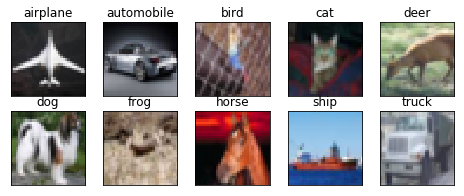

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Functions for Post Training Analysis

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Preparing Data

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Existing Code

#### Model architecture

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

#### Model Summary

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

#### Train Model

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 13s 33ms/step - loss: 1.8555 - acc: 0.2920 - val_loss: 1.4751 - val_acc: 0.4639
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3477 - acc: 0.5125 - val_loss: 1.1195 - val_acc: 0.5991
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1211 - acc: 0.6029 - val_loss: 1.0076 - val_acc: 0.6420
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9935 - acc: 0.6527 - val_loss: 0.9109 - val_acc: 0.6888
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8896 - acc: 0.6926 - val_loss: 0.7727 - val_acc: 0.7353
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8101 - acc: 0.7233 - val_loss: 0.7909 - val_acc: 0.7319
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7538 - acc: 0.7414 - val_loss: 0.7088 - val_acc: 0.7576
Epoch 8/100
390/390 [==============================] - 9s 23m

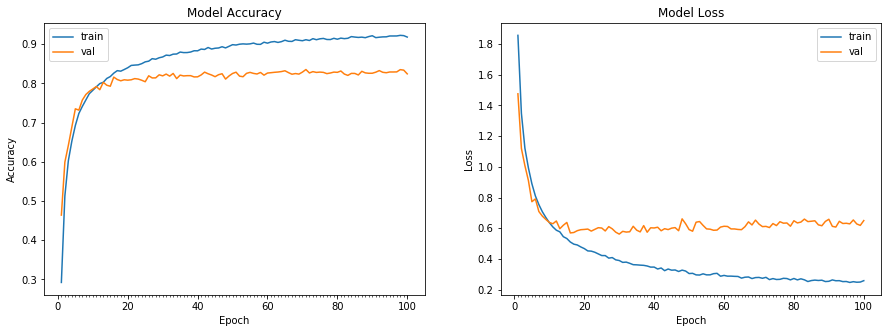

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Modified Code

#### Model Architecture

In [0]:
# Define the model
input = Input(shape=(32, 32, 3,))

# Convolution Block
Conv2D = Convolution2D(32, 3, 3, input_shape=(32, 32, 3))(input) # Dim 30 RF 3
bn = BatchNormalization()(Conv2D)
relu = Activation('relu')(bn)
dp = Dropout(0.2)(relu)

# Convolution Block
Conv2D = Convolution2D(32, 3, 3, input_shape=(32, 32, 3))(dp) # Dim 28 RF 5
bn = BatchNormalization()(Conv2D)
relu = Activation('relu')(bn)
dp = Dropout(0.2)(relu)

# Spatially Seperable Convolution Block
Spatially31 = Convolution2D(64, 3, 1)(dp) # Dim (26,28) RF (7,5)
bn = BatchNormalization()(Spatially31)
relu = Activation('relu')(bn)
dp = Dropout(0.2)(relu)
Spatially13 = Convolution2D(64, 1, 3)(dp) # Dim 26 RF 7
bn = BatchNormalization()(Spatially13)
relu = Activation('relu')(bn)
dp = Dropout(0.2)(relu)

# Depthwise Seperable Convolution Block
depthwise = SeparableConv2D(128, 3, 3)(dp) # Dim 24 RF 9
bn = BatchNormalization()(depthwise)
relu = Activation('relu')(bn)
dp = Dropout(0.2)(relu)

# Transition Block
pointwise = Convolution2D(32, 1, 1, activation='relu')(dp)
maxPool = MaxPooling2D(pool_size=(2, 2))(pointwise) # Dim 12 RF 18

# Group Convolution Block (using 3x3 and 5x5 kernels)
grp3x3 = Convolution2D(64, 3, 3, border_mode='same')(maxPool) # Dim 12 RF 20
bn3x3 = BatchNormalization()(grp3x3)
relu3x3 = Activation('relu')(bn3x3)
dp3x3 = Dropout(0.2)(relu3x3)

grp5x5 = Convolution2D(64, 5, 5, border_mode='same')(maxPool) # Dim 12 RF 22
bn5x5 = BatchNormalization()(grp5x5)
relu5x5 = Activation('relu')(bn5x5)
dp5x5 = Dropout(0.2)(relu5x5)

concat = Concatenate(axis=-1)([dp3x3,dp5x5]) # concatinate channels from both layers
groupedPointwise = Convolution2D(64, 1, 1, activation='relu')(concat)  # Dim 12 RF [22-20]


# Group Convolution Block (using only 3x3 kernels)
grp3x3_1 = Convolution2D(128, 3, 3, border_mode='same')(groupedPointwise) # Dim 12 RF [24-22]
bn3x3_1 = BatchNormalization()(grp3x3_1)
relu3x3_1 = Activation('relu')(bn3x3_1)
dp3x3_1 = Dropout(0.2)(relu3x3_1)

grp3x3_2 = Convolution2D(128, 3, 3, dilation_rate=2, border_mode='same')(dp3x3_1) # Dim 12 RF [28-24]
bn3x3_2 = BatchNormalization()(grp3x3_2)
relu3x3_2 = Activation('relu')(bn3x3_2)
dp3x3_2 = Dropout(0.2)(relu3x3_2)

concat = Concatenate(axis=-1)([dp3x3_1,dp3x3_2]) # concatinate channels from both layers

# Output Block
output = Convolution2D(10, 1, 1, activation='relu')(concat)  # Dim 12 RF [28-22]
outputConv = Convolution2D(10, 12)(output) # Dim 1 RF [40-34]
flatten = Flatten()(outputConv)
softmax = Activation('softmax')(flatten)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Con

#### Model Summary

In [0]:
model = Model(inputs=[input], outputs=[softmax])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 30, 30, 32)   896         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, 30, 30, 32)   128         conv2d_65[0][0]                  
__________________________________________________________________________________________________
activation_58 (Activation)      (None, 30, 30, 32)   0           batch_normalization_47[0][0]     
__________________________________________________________________________________________________
dropout_51

#### Model Compile and Training

mkdir: cannot create directory ‘Assignment6a’: File exists


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=100)`


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 59s 302ms/step - loss: 1.6643 - acc: 0.3823 - val_loss: 2.4026 - val_acc: 0.2906

Epoch 00001: val_acc improved from -inf to 0.29060, saving model to Assignment6a//maxAccuracy.hdf5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 53s 271ms/step - loss: 1.2755 - acc: 0.5389 - val_loss: 1.7026 - val_acc: 0.4430

Epoch 00002: val_acc improved from 0.29060 to 0.44300, saving model to Assignment6a//maxAccuracy.hdf5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 53s 271ms/step - loss: 1.0966 - acc: 0.6083 - val_loss: 1.1929 - val_acc: 0.5904

Epoch 00003: val_acc improved from 0.44300 to 0.59040, saving model to Assignment6a//maxAccuracy.hdf5
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.00153

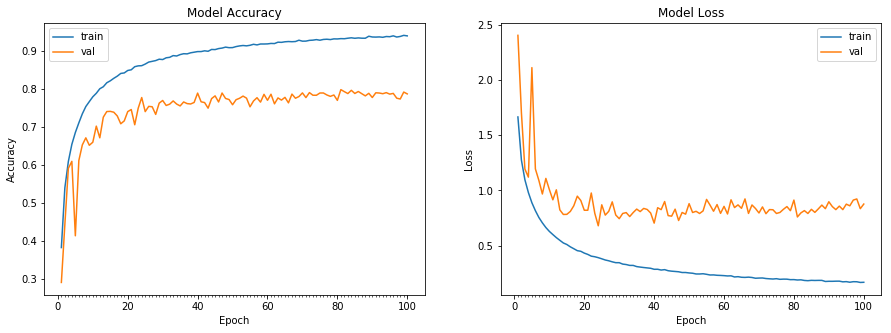

Accuracy on test data is: 78.60


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Image Normalization
datagen = ImageDataGenerator(zoom_range=0.0,featurewise_center=True, featurewise_std_normalization=True,
                             horizontal_flip=False)

# LR Scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Compile Model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003),
              metrics=['accuracy'])

# Checkpoint to save best model
!mkdir "Assignment6a"
filepath="Assignment6a//maxAccuracy.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))